<a href="https://colab.research.google.com/github/ShutTheFuckUpDonny/AI_course/blob/master/%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_13_%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_Light_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Lite.
Проведите серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии.
1. Поменяйте количество нейронов в сверточных слоях, использовав следующие значения:

один слой 2 нейрона,
один слой 4 нейрона,
один слой 16 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с relu на linear

3. Поменяйте размеры batch_size:
10
100
Вся база (50000)

4. Запишите в таблицу получившиеся точности.
5. Напишите выводы по результатам проведенных тестов.

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import random

In [ ]:
#Загружаем cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

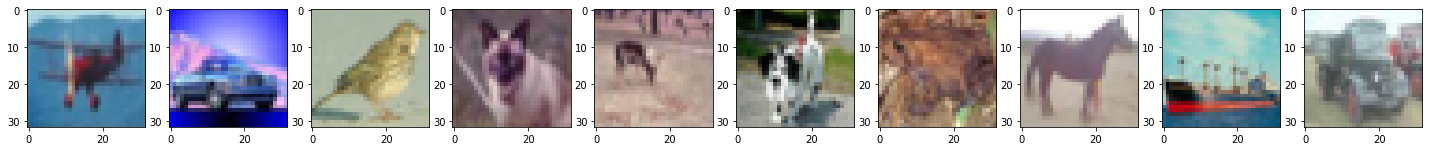

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [ ]:
def create_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(32, 32, 3)))
    model.add(Conv2D(convs, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(convs, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    model.add(Conv2D(convs, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(convs, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(BatchNormalization(input_shape=(32, 32, 3)))
    model.add(Conv2D(convs, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(convs, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [ ]:
def fit_model():
    model = create_model()
    history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)
    
    # рисуем графики
    plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.grid()
    plt.show()

    #Распознаём все тестовые картинки
    prediction = model.predict(x_test)
    #Выбираем номер пример
    n = np.random.randint(x_test.shape[0])
    #Выводим на экран картинку
    plt.imshow(Image.fromarray(x_test[n]).convert('RGBA'))
    plt.show()
    #Выводим на экран результаты
    print("Выход сети: ", prediction[n])
    print("Распознанный образ: ", np.argmax(prediction[n]))
    print("Верный ответ: ", y_test[n])
    print("Распознанный образ на картинке: ", classes[np.argmax(prediction[n])])
    print()
    # получаем последнее значение точности на проверочной выборке
    val_acc = round(history.history['val_accuracy'][-1], 4)
    s = f'Точность при {convs}'
    d = {s:val_acc}
    return d

Epoch 1/20
391/391 [==============================] - 62s 159ms/step - loss: 2.1809 - accuracy: 0.1910 - val_loss: 2.1758 - val_accuracy: 0.2046
Epoch 2/20
391/391 [==============================] - 63s 160ms/step - loss: 2.0082 - accuracy: 0.2700 - val_loss: 1.9700 - val_accuracy: 0.2882
Epoch 3/20
391/391 [==============================] - 63s 161ms/step - loss: 1.8994 - accuracy: 0.3014 - val_loss: 1.8165 - val_accuracy: 0.3375
Epoch 4/20
391/391 [==============================] - 63s 161ms/step - loss: 1.8379 - accuracy: 0.3232 - val_loss: 1.7701 - val_accuracy: 0.3585
Epoch 5/20
391/391 [==============================] - 63s 160ms/step - loss: 1.8053 - accuracy: 0.3320 - val_loss: 1.7751 - val_accuracy: 0.3534
Epoch 6/20
391/391 [==============================] - 62s 160ms/step - loss: 1.7848 - accuracy: 0.3393 - val_loss: 1.7376 - val_accuracy: 0.3543
Epoch 7/20
391/391 [==============================] - 63s 160ms/step - loss: 1.7698 - accuracy: 0.3413 - val_loss: 1.7172 - val_ac

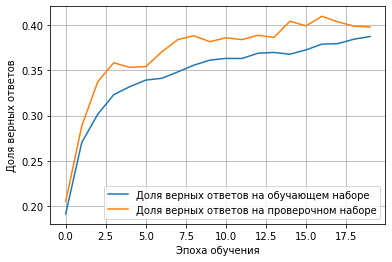

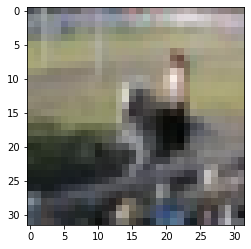

Выход сети:  [0.07373657 0.0009364  0.28316012 0.17029488 0.15734889 0.13521524
 0.05802179 0.03126233 0.08665693 0.00336679]
Распознанный образ:  2
Верный ответ:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Распознанный образ на картинке:  птица

Epoch 1/20
391/391 [==============================] - 71s 182ms/step - loss: 1.9166 - accuracy: 0.2913 - val_loss: 1.8858 - val_accuracy: 0.3165
Epoch 2/20
391/391 [==============================] - 72s 183ms/step - loss: 1.7040 - accuracy: 0.3679 - val_loss: 1.6109 - val_accuracy: 0.4156
Epoch 3/20
391/391 [==============================] - 72s 184ms/step - loss: 1.6469 - accuracy: 0.3932 - val_loss: 1.5955 - val_accuracy: 0.4163
Epoch 4/20
391/391 [==============================] - 72s 185ms/step - loss: 1.6156 - accuracy: 0.4003 - val_loss: 1.5504 - val_accuracy: 0.4370
Epoch 5/20
391/391 [==============================] - 72s 184ms/step - loss: 1.5895 - accuracy: 0.4108 - val_loss: 1.4884 - val_accuracy: 0.4534
Epoch 6/20
391/391 [===================

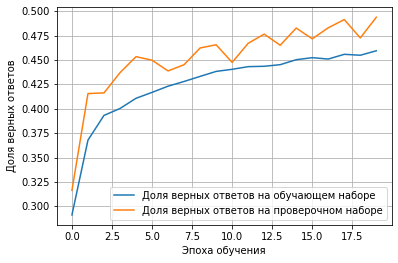

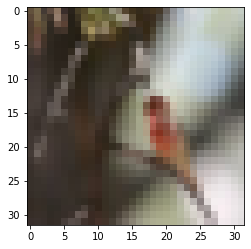

Выход сети:  [0.01770354 0.00041355 0.20160098 0.19977534 0.17038545 0.2491819
 0.09486066 0.06139087 0.00297268 0.00171501]
Распознанный образ:  5
Верный ответ:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Распознанный образ на картинке:  собака

Epoch 1/20
391/391 [==============================] - 117s 299ms/step - loss: 1.6722 - accuracy: 0.3783 - val_loss: 1.5659 - val_accuracy: 0.4346
Epoch 2/20
391/391 [==============================] - 118s 302ms/step - loss: 1.3537 - accuracy: 0.5057 - val_loss: 1.2438 - val_accuracy: 0.5519
Epoch 3/20
391/391 [==============================] - 119s 305ms/step - loss: 1.2129 - accuracy: 0.5626 - val_loss: 1.0762 - val_accuracy: 0.6122
Epoch 4/20
391/391 [==============================] - 119s 305ms/step - loss: 1.1267 - accuracy: 0.5947 - val_loss: 1.0805 - val_accuracy: 0.6093
Epoch 5/20
391/391 [==============================] - 118s 302ms/step - loss: 1.0687 - accuracy: 0.6180 - val_loss: 0.9478 - val_accuracy: 0.6613
Epoch 6/20
391/391 [==============

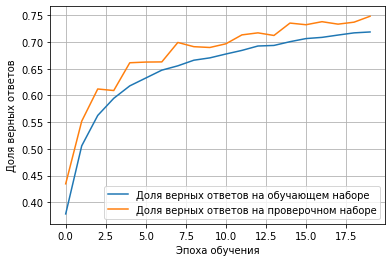

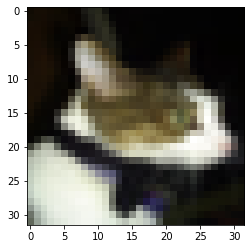

Выход сети:  [0.01669102 0.02523797 0.05567832 0.29444113 0.00564806 0.04479583
 0.45396438 0.01600048 0.07773981 0.00980292]
Распознанный образ:  6
Верный ответ:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Распознанный образ на картинке:  лягушка

{'Точность при 2': 0.3982}
{'Точность при 4': 0.4938}
{'Точность при 16': 0.7484}


In [ ]:
lst = []
for convs in (2, 4, 16):
    create_model()
    lst.append(fit_model())

for i in lst:
    print(i)

Вывод.
